# ЛАБОРАТОРНАЯ РАБОТА №1.               Поиленкова Анна                  А-05-18         Вар 20 
----

In [27]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

1. Вычислить интеграл  с помощью средств  Python.

In [28]:
N = 20
a = -0.1*N   #
b = 7 - 0.1*N   # [0 ; pi/2]


fun = lambda x: np.exp(x)*np.cos(np.pi*0.1*N*x)

answer = integrate.quad(fun, a, b)  
print ("ОТВЕТ:", answer[0])

ОТВЕТ: 3.663132913658664


2. Построить график подынтегральной функции.

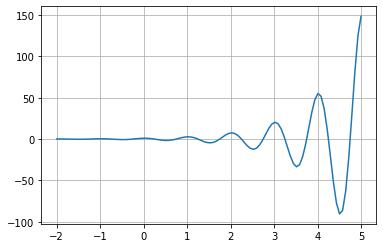

In [29]:
def f(x0):
    N = 20 
    return np.exp(x0)*np.cos(np.pi*0.1*N*x0) 

x_graph = np.linspace(-2,5 , 100, endpoint = True)
plt.plot(x_graph, f(x_graph))
plt.grid('True')
plt.show()

3. Составить программу, содержащую следующие разделы: 
    
    
       а) вычисление  интеграла по составным квадратурным формулам  левых прямоугольников и индивидуального варианта  с заданным шагом h;

In [30]:
# Функция для левых прямоугольников 

def left_triangle(h0, y0, a0, b0):
    I = 0
    for i in range(0, math.ceil((b0-a0)/h0) - 1 ):  # округление числа в большую сторону
        I += y0[i]
    I*=h0
    print("Приближенное значение интеграла по формуле левых прямоугольников = ",I)
    return I
    
# функция по индивидуальному варианту ( формула трапеции )


def trapezium(h0, y0, a0, b0):
    I = 0
    for i in range(0, math.ceil((b0-a0)/h0) -1  ):  # округление числа в большую сторону
        I += (y0[i] + y0[i+1])/2
        #print(i, " - ", I)
    I*=h0
    print("Приближенное значение интеграла по формуле трапеции = ",I)
    return I
    

In [31]:
h = 0.0001   # заданный шаг разбиения 

y = np.zeros( math.ceil((b-a)/h ))
x = np.arange(a, b, h)

for i in range(math.ceil((b-a)/h)):
    y[i] = f(x[i])

left_triangle(h, y, a, b)
trapezium(h, y, a, b)

Приближенное значение интеграла по формуле левых прямоугольников =  3.6408793169949196
Приближенное значение интеграла по формуле трапеции =  3.648292464692485


3.648292464692485

------------------------------ формула левых прямоугольников -----------------------------------

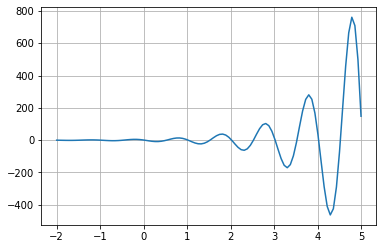

 M =  763.1394000088535


In [32]:
# априорная оценка 
def f_1(x0):  # первая производна функции
    N = 20 
    return np.exp(x0)*(np.cos(np.pi*0.1*N*x0) - np.sin(np.pi*0.1*N*x0)*np.pi*0.1*N)

# график первой прозводной
x_graph = np.linspace(-2, 5 , 100, endpoint = True)
plt.plot(x_graph, f_1(x_graph))
plt.grid('True')
plt.show()

# по графику определяем примерную точку максимума (примерно x = 4.8)
from scipy.misc import derivative
M = derivative(f, 4.8, dx = 0.01)   
print(" M = ",M)

In [33]:
# правило Рунге
def runge (I, I0, p):
    return  (I - I0)/(pow(2,p)-1)

In [34]:
eps = 10**(-3)

h1 = ((eps*2)/(M*(b-a)))
print("Шаг разбиения для левых прямоугольников < ",h1 )

n =  math.ceil((b-a)/h1)
print("Число разбиений для левых прямоугольников  = ", n)

y1 = np.zeros( math.ceil((b-a)/h1 ))
x1 = np.arange(a, b, h1)

for i in range(math.ceil((b-a)/h1)):
    y1[i] = f(x1[i])
    
# шаг разбиения в 2 раза меньше для формулы Рунге
h2 = h1/2
y2 = np.zeros( math.ceil((b-a)/(h2) ))
x2 = np.arange(a, b, h2)

for i in range(math.ceil((b-a)/h2)):
    y2[i] = f(x2[i])

#---------------------------------------
print("шаг h")
I_2h_left = left_triangle(h1, y1, a, b)
print("шаг h/2")
I_h_left = left_triangle(h2, y2, a, b) 


R_left = runge(I_h_left,I_2h_left, 1) # порядок точности у лев треуг = 1
print("Погрешность по Рунге = ",R_left)
print("Уточнение по Рунге для ф.левых прямоугольников = ",I_h_left+ R_left)
print("Погрешность уточненного знач. интерг  = ", abs(answer[0] -( I_h_left+ R_left)))

Шаг разбиения для левых прямоугольников <  3.743933096770669e-07
Число разбиений для левых прямоугольников  =  18696916
шаг h
Приближенное значение интеграла по формуле левых прямоугольников =  3.6630885047212978
шаг h/2
Приближенное значение интеграла по формуле левых прямоугольников =  3.663102383270613
Погрешность по Рунге =  1.3878549315116118e-05
Уточнение по Рунге для ф.левых прямоугольников =  3.663116261819928
Погрешность уточненного знач. интерг  =  1.665183873589271e-05


------------------------------ формула трапеции-----------------------------------

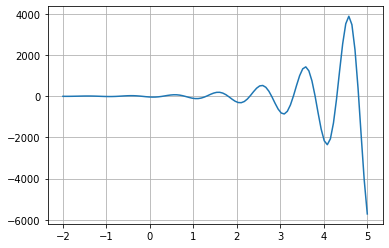

 M2 =  5709.06782057591


In [35]:
# априорная оценка 
def f_2(x0):  # вторая производна функции
    N = 20 
    return np.exp(x0)*(np.cos(np.pi*0.1*N*x0) - 2*np.sin(np.pi*0.1*N*x0)*np.pi*0.1*N -np.cos(np.pi*0.1*N*x0)*np.pi**2*0.01*N**2)
# график второй прозводной
x_graph = np.linspace(-2, 5 , 100, endpoint = True)
plt.plot(x_graph, f_2(x_graph))
plt.grid('True')
plt.show()
# по графику определяем примерную точку максимума (примерно x = 5)
from scipy.misc import derivative
M2 = derivative(f, 5, dx = 0.01, n = 2)  
print(" M2 = ",abs(M2))

In [36]:
eps = 10**(-8)

h_1 = ( ((eps*12)/(abs(M2)*(b-a))) )**(1/2)
print("шаг разбиения для трапеции < ",h_1 )

n_1 =  math.ceil((b-a)/h_1)
print("Число разбиений для трапеции  = ", n_1)

y_1 = np.zeros( math.ceil((b-a)/h_1 ))
x_1 = np.arange(a, b, h_1)

for i in range(math.ceil((b-a)/h_1)):
    y_1[i] = f(x_1[i])

# шаг разбиения в 2 раза меньше для формулы Рунге
h_2 = h_1/2
y_2 = np.zeros( math.ceil((b-a)/(h_2) ))
x_2 = np.arange(a, b, h_2)

for i in range(math.ceil((b-a)/h_2)):
    y_2[i] = f(x_2[i])

print("шаг h")
I_2h_trap = trapezium(h_1, y_1, a, b)
print("шаг h/2")
I_h_trap = trapezium(h_2, y_2, a, b)
R_trap= runge(I_h_trap,I_2h_trap, 2) # потряк точности у трапец = 2

print("Погрешность по Рунге = ",R_trap)
print("Уточнение по Рунге для ф.трапеции = ",I_h_trap + R_trap)
print("Погрешность уточненного знач. интерг  = ", abs(answer[0] -(I_h_trap + R_trap)))

шаг разбиения для трапеции <  1.7328421445448293e-06
Число разбиений для трапеции  =  4039607
шаг h
Приближенное значение интеграла по формуле трапеции =  3.6630622306759313
шаг h/2
Приближенное значение интеграла по формуле трапеции =  3.663062230647665
Погрешность по Рунге =  -9.422092735652162e-12
Уточнение по Рунге для ф.трапеции =  3.6630622306382428
Погрешность уточненного знач. интерг  =  7.068302042112506e-05


Задача 1.2
--


In [5]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [8]:
N = 20
a = 0  #
b = np.pi/2   # [0 ; pi/2]


fun = lambda x: np.cos(x)

answer = integrate.quad(fun, a, b)  
print ("ОТВЕТ:", answer[0])

ОТВЕТ: 0.9999999999999999


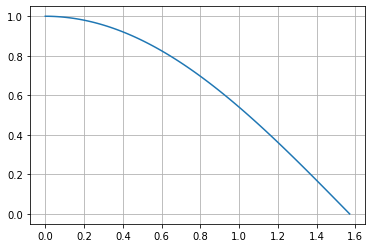

In [12]:
def f(x0):
    N = 20 
    return np.cos(x0) 

x_graph = np.linspace(0, np.pi/2 , 100, endpoint = True)
plt.plot(x_graph, f(x_graph))
plt.grid('True')
plt.show()

In [19]:
# Функция для левых прямоугольников 

def left_triangle(h0, y0, a0, b0):
    I = 0
    for i in range(0, math.ceil((b0-a0)/h0) - 1 ):  # округление числа в большую сторону
        I += y0[i]
    I*=h0
    print("Приближенное значение интеграла по формуле левых прямоугольников = ",I)
    return I
    
# функция по индивидуальному варианту ( формула трапеции )


def trapezium(h0, y0, a0, b0):
    I = 0
    for i in range(0, math.ceil((b0-a0)/h0) -1  ):  # округление числа в большую сторону
        I += (y0[i] + y0[i+1])/2
        #print(i, " - ", I)
    I*=h0
    print("Приближенное значение интеграла по формуле трапеции = ",I)
    return I
    

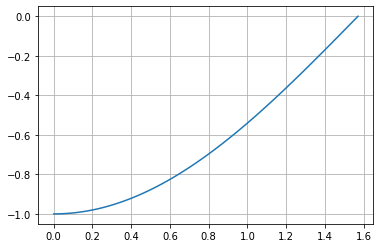

 M2 =  0.9999916666947328


In [22]:
# априорная оценка 
def f_2(x0):  # вторая производна функции
    N = 20 
    return -np.cos(x0)
x_graph = np.linspace(0, np.pi/2 , 100, endpoint = True)
plt.plot(x_graph, f_2(x_graph))
plt.grid('True')
plt.show()
# по графику определяем примерную точку максимума (примерно x = np.pi/2)
from scipy.misc import derivative
M2 = derivative(f, 0, dx = 0.01, n = 2)  
print(" M2 = ",abs(M2))

In [23]:
# правило Рунге
def runge (I, I0, p):
    return  (I - I0)/(pow(2,p)-1)

In [24]:
eps = 10**(-8)

h_1 = ( ((eps*12)/(abs(M2)*(b-a))) )**(1/2)
print("шаг разбиения для трапеции < ",h_1 )

n_1 =  math.ceil((b-a)/h_1)
print("Число разбиений для трапеции  = ", n_1)

y_1 = np.zeros( math.ceil((b-a)/h_1 ))
x_1 = np.arange(a, b, h_1)

for i in range(math.ceil((b-a)/h_1)):
    y_1[i] = f(x_1[i])

# шаг разбиения в 2 раза меньше для формулы Рунге
h_2 = h_1/2
y_2 = np.zeros( math.ceil((b-a)/(h_2) ))
x_2 = np.arange(a, b, h_2)

for i in range(math.ceil((b-a)/h_2)):
    y_2[i] = f(x_2[i])

print("шаг h")
I_2h_trap = trapezium(h_1, y_1, a, b)
print("шаг h/2")
I_h_trap = trapezium(h_2, y_2, a, b)
R_trap= runge(I_h_trap,I_2h_trap, 2) # потряк точности у трапец = 2

print("Погрешность по Рунге = ",R_trap)
print("Уточнение по Рунге для ф.трапеции = ",I_h_trap + R_trap)
print("Погрешность уточненного знач. интерг  = ", abs(answer[0] -(I_h_trap + R_trap)))

шаг разбиения для трапеции <  0.0002763964712275524
Число разбиений для трапеции  =  5684
шаг h
Приближенное значение интеграла по формуле трапеции =  0.9999999930149018
шаг h/2
Приближенное значение интеграла по формуле трапеции =  0.9999999977895991
Погрешность по Рунге =  1.5915657680665163e-09
Уточнение по Рунге для ф.трапеции =  0.9999999993811649
Погрешность уточненного знач. интерг  =  6.188349832569884e-10
